# Model training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report
from sklearn.metrics import confusion_matrix, classification_report


In [20]:
df = pd.read_csv("../data/prediction.csv", index_col=0, parse_dates=True)

In [21]:
df.dropna(inplace=True)

In [22]:
df.head()

,rsi_1000,rsi_rate_1000,rsi_10000,rsi_rate_10000,rsi_100000,rsi_rate_100000,arn_down_1000,arn_1000,arn_up_1000,arn_rate_1000,...,fi_1000,fi_rate_1000,fi_10000,fi_rate_10000,fi_100000,fi_rate_100000,vol,sc,random,target
2018-01-20 16:44:30.811,51.092046,0.000946,50.480002,0.000049,50.040196,-0.000001,31.5,68.5,100.0,0.0116,...,2.805719,0.005516,2.168545,0.000352,-0.616061,-0.000031,0.091563,-0.135943,0.459188,1
2018-01-20 18:42:11.468,51.918362,0.001923,50.579904,0.000055,50.049909,-0.000001,0.2,99.8,100.0,0.1586,...,3.306584,0.005387,2.380549,0.000333,-0.185466,-0.000026,0.088706,-0.213464,0.900696,0
2018-01-20 19:46:59.346,50.370105,-0.000624,50.466023,0.000050,50.041302,-0.000001,13.1,63.8,76.9,0.1226,...,-2.999015,-0.005697,1.770447,0.000297,-0.984117,-0.000034,0.087077,-0.161973,0.177152,1
2018-01-20 21:11:51.801,50.807559,0.000555,50.499539,0.000059,50.044787,-0.000001,0.1,56.8,56.9,0.0198,...,-0.674543,-0.000384,1.898740,0.000361,-0.746076,-0.000031,0.085368,-0.128818,0.576585,0
2018-01-21 00:18:39.800,49.608940,-0.001772,50.394686,0.000054,50.037201,-0.000001,52.7,-30.8,21.9,-0.1188,...,-2.799998,-0.005833,1.527080,0.000358,-1.177704,-0.000035,0.084229,-0.161722,0.893625,0


In [23]:
X = df.drop(["target"], axis=1)
X.head(3)

,rsi_1000,rsi_rate_1000,rsi_10000,rsi_rate_10000,rsi_100000,rsi_rate_100000,arn_down_1000,arn_1000,arn_up_1000,arn_rate_1000,...,bb_wband_rate_100000,fi_1000,fi_rate_1000,fi_10000,fi_rate_10000,fi_100000,fi_rate_100000,vol,sc,random
2018-01-20 16:44:30.811,51.092046,0.000946,50.480002,0.000049,50.040196,-0.000001,31.5,68.5,100.0,0.0116,...,-0.000836,2.805719,0.005516,2.168545,0.000352,-0.616061,-0.000031,0.091563,-0.135943,0.459188
2018-01-20 18:42:11.468,51.918362,0.001923,50.579904,0.000055,50.049909,-0.000001,0.2,99.8,100.0,0.1586,...,-0.000821,3.306584,0.005387,2.380549,0.000333,-0.185466,-0.000026,0.088706,-0.213464,0.900696
2018-01-20 19:46:59.346,50.370105,-0.000624,50.466023,0.000050,50.041302,-0.000001,13.1,63.8,76.9,0.1226,...,-0.000813,-2.999015,-0.005697,1.770447,0.000297,-0.984117,-0.000034,0.087077,-0.161973,0.177152


In [24]:
y = df.target
y

2018-01-20 16:44:30.811    1
2018-01-20 18:42:11.468    0
2018-01-20 19:46:59.346    1
2018-01-20 21:11:51.801    0
2018-01-21 00:18:39.800    0
                          ..
2021-06-19 02:35:14.518    0
2021-06-19 03:29:01.660    1
2021-06-19 06:03:22.630    1
2021-06-19 12:15:50.424    0
2021-06-19 12:48:14.298    0
Name: target, Length: 9878, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17,
                                                    shuffle=False)

In [36]:
n_estimators = 10000
model = RandomForestClassifier(max_depth=2, n_estimators=n_estimators,
                            criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=10000)

Text(-1.5, 0.5, 'Predicted label')

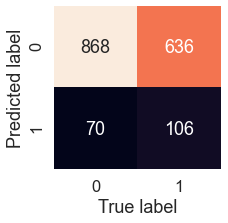

In [37]:
y_preds = model.predict(X_test)	

sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_preds, y_test),
                 annot=True,
                 cbar=False,
                 fmt='d')
plt.xlabel("True label")
plt.ylabel("Predicted label")

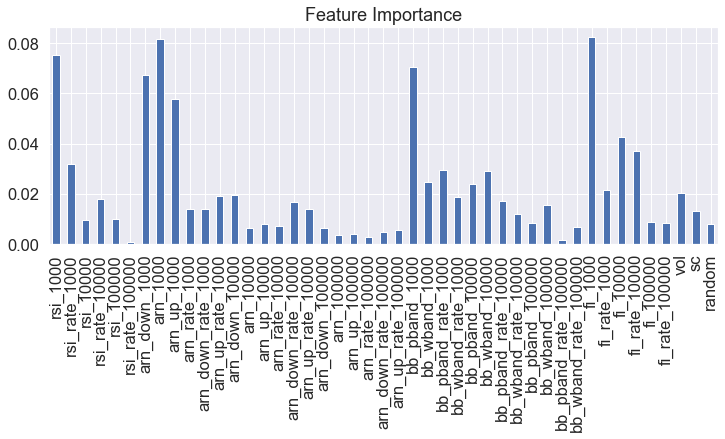

In [38]:
feature_dict = dict(zip(X_train.columns, list(model.feature_importances_)))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(12, 4));

In [39]:
y_pred_rf = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.93      0.71       938
           1       0.60      0.14      0.23       742

    accuracy                           0.58      1680
   macro avg       0.59      0.53      0.47      1680
weighted avg       0.59      0.58      0.50      1680



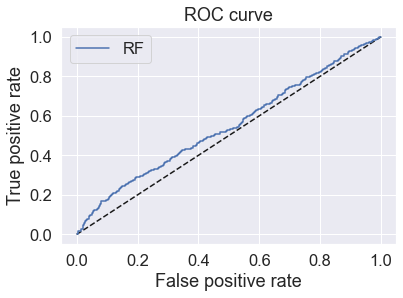

In [40]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Plotting

In [41]:
prices = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

In [42]:
df.target

2018-01-20 16:44:30.811    1
2018-01-20 18:42:11.468    0
2018-01-20 19:46:59.346    1
2018-01-20 21:11:51.801    0
2018-01-21 00:18:39.800    0
                          ..
2021-06-19 02:35:14.518    0
2021-06-19 03:29:01.660    1
2021-06-19 06:03:22.630    1
2021-06-19 12:15:50.424    0
2021-06-19 12:48:14.298    0
Name: target, Length: 9878, dtype: int64

In [43]:
plot = df[-len(y_pred):].copy()
plot["close"] = prices.reindex(plot.index).close
plot["up"] = list(map(lambda x, c: c if x==1 else None, y_pred, plot.close))
plot["down"] = list(map(lambda x, c: c if x==0 else None, y_pred, plot.close))


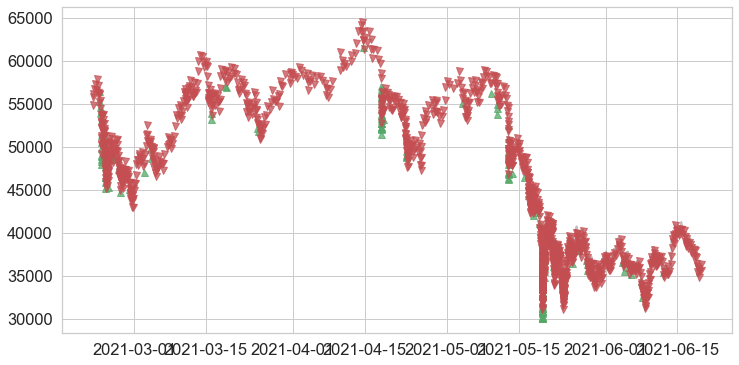

In [44]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(prices.close[-500000:], alpha=.5, color="gray")

ax.plot(plot.up, marker='^', markersize=7,
                     alpha=0.75, label='upcross', color='g', linewidth=0)

ax.plot(plot.down, marker='v', markersize=7,
                     alpha=0.75, label='upcross', color='r', linewidth=0)

In [18]:
y_test.value_counts()

0    822
1    660
Name: target, dtype: int64